In [1]:
import pandas as pd
from scipy.io import arff


## Loading data from ARFF files

In [2]:
# Load training data
train_data, train_meta = arff.loadarff('KDDTrain+.arff')
df_train = pd.DataFrame(train_data)

# Load testing data
test_data, test_meta = arff.loadarff('KDDTest+.arff')
df_test = pd.DataFrame(test_data)

df_combined = pd.concat([df_train, df_test], ignore_index=True)
df_combined = df_combined.drop_duplicates()


In [3]:
df_combined.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,b'tcp',b'ftp_data',b'SF',491.0,0.0,b'0',0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,b'normal'
1,0.0,b'udp',b'other',b'SF',146.0,0.0,b'0',0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,b'normal'
2,0.0,b'tcp',b'private',b'S0',0.0,0.0,b'0',0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,b'anomaly'
3,0.0,b'tcp',b'http',b'SF',232.0,8153.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,b'normal'
4,0.0,b'tcp',b'http',b'SF',199.0,420.0,b'0',0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,b'normal'


In [4]:
for df in [df_combined]:
    for col in df.select_dtypes([object]):  
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


In [5]:
df_combined.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147888 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     147888 non-null  float64
 1   protocol_type                147888 non-null  object 
 2   service                      147888 non-null  object 
 3   flag                         147888 non-null  object 
 4   src_bytes                    147888 non-null  float64
 5   dst_bytes                    147888 non-null  float64
 6   land                         147888 non-null  object 
 7   wrong_fragment               147888 non-null  float64
 8   urgent                       147888 non-null  float64
 9   hot                          147888 non-null  float64
 10  num_failed_logins            147888 non-null  float64
 11  logged_in                    147888 non-null  object 
 12  num_compromised              147888 non-null  float64
 13 

## Checking for unique values in non-numerical columns

In [7]:
unique_values = df_combined['protocol_type'].unique()
print(unique_values)


['tcp' 'udp' 'icmp']


In [8]:
unique_service = df_combined['service'].nunique()
print(unique_service)

70


In [9]:
unique_flag = df_combined['flag'].unique()
print(unique_flag)

['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [10]:
unique_land = df_combined['land'].unique()
print(unique_land)

['0' '1']


In [11]:
unique_in = df_combined['logged_in'].unique()
print(unique_in)

['0' '1']


In [12]:
unique_class = df_combined['class'].unique()
print(unique_class)

['normal' 'anomaly']


In [13]:
num_nans = df_combined['land'].isna().sum()
print(f"Number of NaN values in 'land': {num_nans}")


Number of NaN values in 'land': 0


## Categorical Data Encoding

In [14]:
#one hot encode protocol_type since only three possibilities: icmp, tcp, udp
df_combined = pd.get_dummies(df_combined, columns=['protocol_type'])


In [15]:
#label encoding service and flag since too many possible values
from sklearn.preprocessing import LabelEncoder

encoder_service = LabelEncoder()
df_combined['service'] = encoder_service.fit_transform(df_combined['service'])


In [16]:
encoder_flag = LabelEncoder()
df_combined['flag'] = encoder_service.fit_transform(df_combined['flag'])


In [17]:
print(df_combined[['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp']].head())  # One-hot encoded
print(df_combined[['service', 'flag']].head())  # Label encoded


   protocol_type_icmp  protocol_type_tcp  protocol_type_udp
0                   0                  1                  0
1                   0                  0                  1
2                   0                  1                  0
3                   0                  1                  0
4                   0                  1                  0
   service  flag
0       20     9
1       44     9
2       49     5
3       24     9
4       24     9


In [18]:
num_nans = df_combined['land'].isna().sum()
print(f"Number of NaN values in 'land': {num_nans}")


Number of NaN values in 'land': 0


In [19]:
df_combined['land'] = pd.to_numeric(df_combined['land'], downcast='integer', errors='coerce')
print(df_combined['land'])
print(df_combined['land'].dtype)

0         0
1         0
2         0
3         0
4         0
         ..
148510    0
148512    0
148513    0
148514    0
148516    0
Name: land, Length: 147888, dtype: int8
int8


In [20]:
df_combined['logged_in'] = pd.to_numeric(df_combined['logged_in'], downcast='integer', errors='coerce')
print(df_combined['logged_in'])
print(df_combined['logged_in'].dtype)

0         0
1         0
2         0
3         1
4         1
         ..
148510    1
148512    1
148513    1
148514    1
148516    0
Name: logged_in, Length: 147888, dtype: int8
int8


In [21]:
df_combined['class'] = df_combined['class'].apply(lambda x: 1 if x == 'anomaly' else 0).astype(int)
# anomaly = 1 
# normal = 0

In [22]:
# check how many total duplicates (entire row duplicates)
duplicate_rows = df_combined[df_combined.duplicated()]

print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [23]:
df_combined = df_combined.drop_duplicates()


In [24]:
# check how many total duplicates (entire row duplicates)
duplicate_rows = df_combined[df_combined.duplicated()]

print(f"Number of duplicate rows: {len(duplicate_rows)}")


Number of duplicate rows: 0


In [25]:
df_combined['class'].head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int32

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X = df_combined.drop(columns=['class'])
y = df_combined['class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
common_rows = X_train.merge(X_test, how='inner')
print(f"Number of overlapping rows: {len(common_rows)}")


Number of overlapping rows: 25


## Normalizing

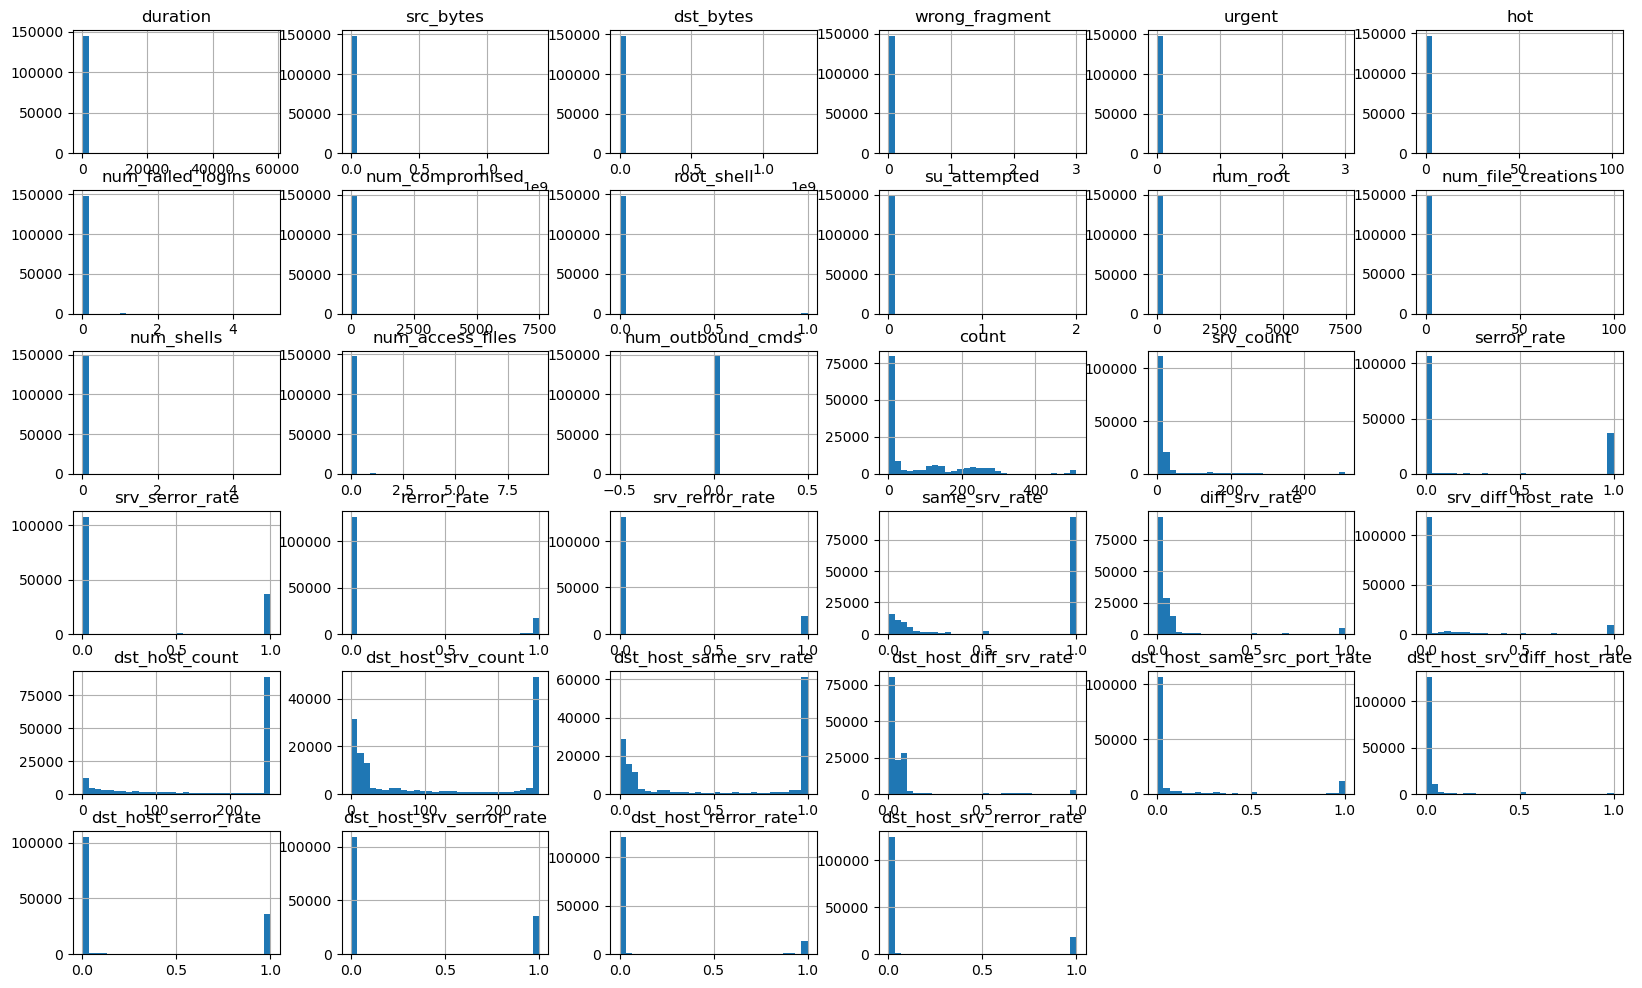

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = df_combined.select_dtypes(include=['int64', 'float64']).columns  # Get numeric columns

df_combined[num_cols].hist(figsize=(20, 12), bins=30)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns  # Get numeric columns
print(num_cols)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted',
       'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [30]:
X_train.head()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
96052,-0.113302,23,1,-0.008680,-0.004980,0,-0.085949,-0.010038,-0.092919,-0.060961,...,0.030768,-0.472009,-0.283051,-0.599278,-0.585906,2.683280,2.582833,0,1,0
126692,-0.113302,24,9,-0.008607,-0.004362,0,-0.085949,-0.010038,-0.092919,-0.060961,...,-0.433555,0.601213,-0.000565,-0.599278,-0.585906,-0.421170,-0.405766,0,1,0
141811,-0.113302,24,9,-0.008583,-0.004904,0,-0.085949,-0.010038,-0.092919,-0.060961,...,-0.433555,-0.472009,-0.283051,-0.599278,-0.585906,-0.421170,-0.405766,0,1,0
43486,15.211907,10,3,206.672317,-0.004980,0,-0.085949,-0.010038,-0.092919,-0.060961,...,-0.020824,-0.374443,-0.283051,-0.599278,-0.585906,-0.328036,2.582833,0,1,0
36289,-0.113302,24,9,-0.008571,-0.004645,0,-0.085949,-0.010038,-0.092919,-0.060961,...,-0.433555,-0.439487,-0.188889,-0.599278,-0.585906,-0.421170,-0.405766,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

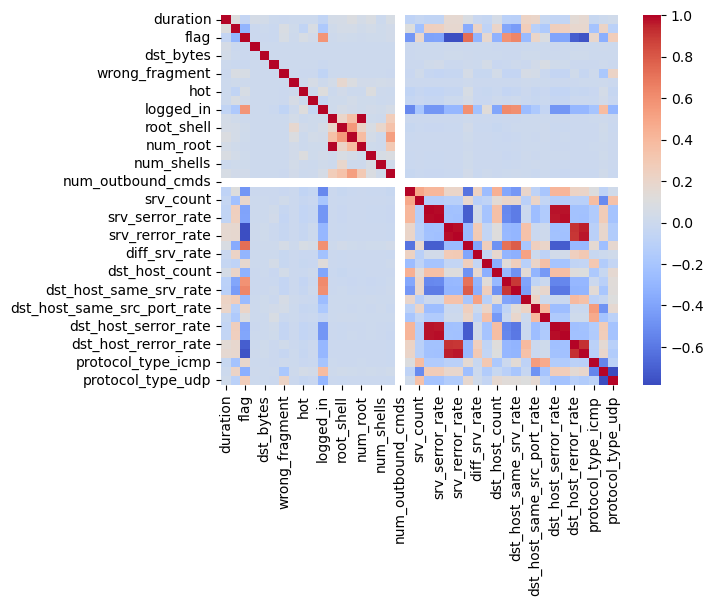

In [31]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show

In [32]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 96052 to 117191
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     118310 non-null  float64
 1   service                      118310 non-null  int32  
 2   flag                         118310 non-null  int32  
 3   src_bytes                    118310 non-null  float64
 4   dst_bytes                    118310 non-null  float64
 5   land                         118310 non-null  int8   
 6   wrong_fragment               118310 non-null  float64
 7   urgent                       118310 non-null  float64
 8   hot                          118310 non-null  float64
 9   num_failed_logins            118310 non-null  float64
 10  logged_in                    118310 non-null  int8   
 11  num_compromised              118310 non-null  float64
 12  root_shell                   118310 non-null  float64


In [33]:
X_test.head()
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29578 entries, 69647 to 126856
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     29578 non-null  float64
 1   service                      29578 non-null  int32  
 2   flag                         29578 non-null  int32  
 3   src_bytes                    29578 non-null  float64
 4   dst_bytes                    29578 non-null  float64
 5   land                         29578 non-null  int8   
 6   wrong_fragment               29578 non-null  float64
 7   urgent                       29578 non-null  float64
 8   hot                          29578 non-null  float64
 9   num_failed_logins            29578 non-null  float64
 10  logged_in                    29578 non-null  int8   
 11  num_compromised              29578 non-null  float64
 12  root_shell                   29578 non-null  float64
 13  su_attempte

In [34]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 118310 entries, 96052 to 117191
Series name: class
Non-Null Count   Dtype
--------------   -----
118310 non-null  int32
dtypes: int32(1)
memory usage: 1.4 MB


In [35]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 29578 entries, 69647 to 126856
Series name: class
Non-Null Count  Dtype
--------------  -----
29578 non-null  int32
dtypes: int32(1)
memory usage: 346.6 KB


## Random Forest model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize model
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9962
F1 Score: 0.9962

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15394
           1       1.00      0.99      1.00     14184

    accuracy                           1.00     29578
   macro avg       1.00      1.00      1.00     29578
weighted avg       1.00      1.00      1.00     29578



In [37]:
#cross Validation with f1

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-validated F1 scores:", scores)
print("Mean F1:", scores.mean())


Cross-validated F1 scores: [0.99556224 0.99573133 0.99522445 0.99602725 0.99522411]
Mean F1: 0.9955538766313913


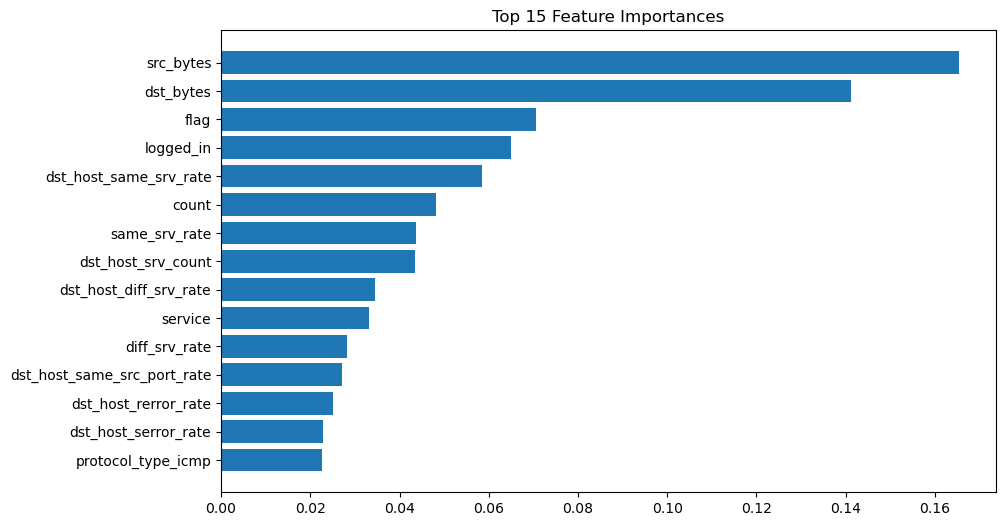

In [38]:
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'][:15], feat_imp_df['importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances')
plt.show()


## KMeans Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit KMeans with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_


In [40]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_1 = accuracy_score(y, cluster_labels)
accuracy_2 = accuracy_score(y, 1 - cluster_labels)

if accuracy_2 > accuracy_1:
    cluster_labels = 1 - cluster_labels  # flip the cluster labels

print("Accuracy:", accuracy_score(y, cluster_labels))
print("Classification Report:\n", classification_report(y, cluster_labels))


Accuracy: 0.878833982473223
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89     76967
           1       0.98      0.76      0.86     70921

    accuracy                           0.88    147888
   macro avg       0.90      0.87      0.88    147888
weighted avg       0.90      0.88      0.88    147888



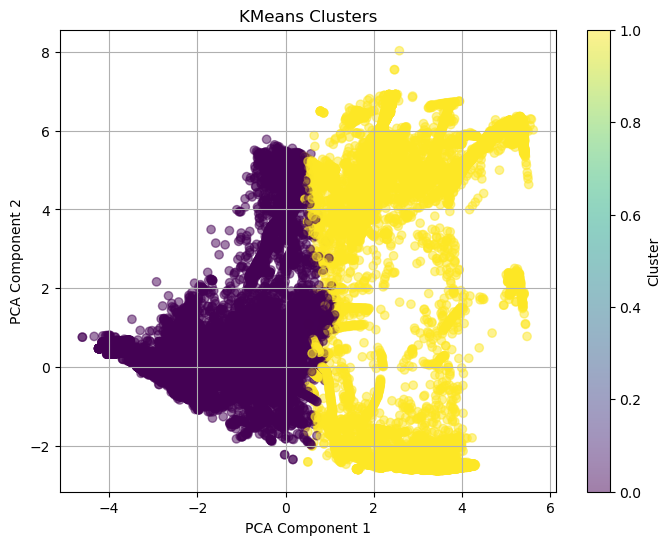

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [42]:
print(pca.explained_variance_ratio_)


[0.18415957 0.1225368 ]


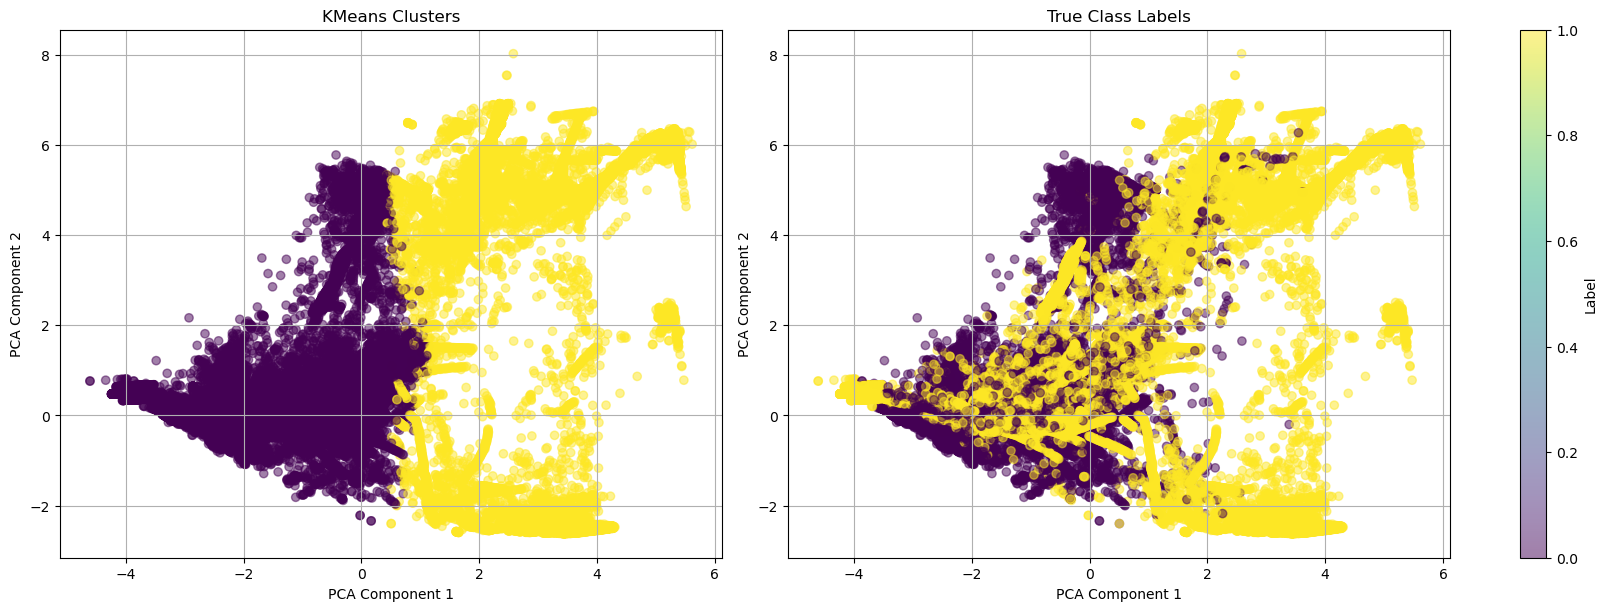

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

# KMeans Clusters
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
axes[0].set_title('KMeans Clusters')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')
axes[0].grid(True)

# True Labels
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
axes[1].set_title('True Class Labels')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')
axes[1].grid(True)

fig.colorbar(scatter, ax=axes, label='Label', orientation='vertical')

plt.show()


## SVM Model

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


Accuracy: 0.9503685171411184
F1 Score: 0.9502567677598575

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     15394
           1       0.98      0.92      0.95     14184

    accuracy                           0.95     29578
   macro avg       0.95      0.95      0.95     29578
weighted avg       0.95      0.95      0.95     29578



In [47]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_model = make_pipeline(StandardScaler(), SVC())
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X, y, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")


Cross-Validation Accuracy: 0.9823041761332901 ± 0.00031701580032813273


In [48]:
#using f1 scores

svm_model = make_pipeline(StandardScaler(), SVC())
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X, y, cv=cv, scoring='f1_weighted')
print("Cross-validated F1 scores:", cv_scores)
print("Mean F1:", cv_scores.mean())

Cross-validated F1 scores: [0.9821855  0.98198097 0.98273331]
Mean F1: 0.9822999298661651
